# Chapter 3

## Interaction Terms

A demonstration of the statsmodels formula api for including interaction terms in our model

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
boston = sm.datasets.get_rdataset("Boston", "MASS").data

In [3]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# Here we use the beefier "statsmodels" package to do the analysis that R would 
# do for us, giving the errors, t-values, p-values, etc.

# statsmodels doesn't assume there'll be an intercept, so you have to add one
X_train =  sm.add_constant(boston)

# the below formula is a regression on lstat and age, including an lstat*age interaction term  
model = smf.ols('medv~lstat*age', data=boston) # == lstat+age+lstat:age
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 13 May 2019   Prob (F-statistic):           4.86e-88
Time:                        20:03:38   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

/home/wpg/.local/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


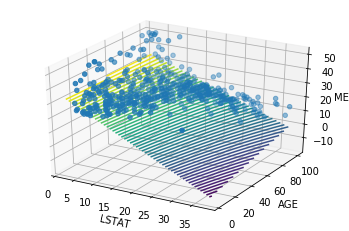

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xs=X_train.lstat, ys=X_train.age, zs=X_train.medv)
ax.set_xlabel("LSTAT")
ax.set_ylabel("AGE")
ax.set_zlabel("MEDV")

def getFittedValue(x, y):
    B0, B1, B2, B3 = results.params
    return B0 + B1*x + B2*y + B3*x*y

xmin = np.min(X_train.lstat)
xmax = np.max(X_train.lstat)
ymin = np.min(X_train.age)
ymax = np.max(X_train.age)


x = np.linspace(xmin, xmax, 30)
y = np.linspace(ymin, ymax, 30)

X, Y = np.meshgrid(x, y)
Z = getFittedValue(X, Y)

ax.contour3D(X, Y, Z, 50)